 **Preprocess the Data**

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

# Load the synthetic dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Mlrepo/Spatial clustering and hot spot analysis /synthetic_spatial_data.csv')

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

# Set the coordinate reference system (CRS) if needed
gdf.set_crs(epsg=4326, inplace=True)


,x,y,value,geometry
0,-2.509198,2.840633,10.312387,POINT (-2.50920 2.84063)
1,9.014286,-8.317201,90.255291,POINT (9.01429 -8.31720)
2,4.639879,-6.767426,50.525237,POINT (4.63988 -6.76743)
3,1.973170,7.971084,82.645747,POINT (1.97317 7.97108)
4,-6.879627,2.128581,32.004960,POINT (-6.87963 2.12858)
...,...,...,...,...
195,-3.015809,8.615147,47.396164,POINT (-3.01581 8.61515)
196,4.519114,7.168255,66.755774,POINT (4.51911 7.16826)
197,7.942205,-1.420119,17.231987,POINT (7.94221 -1.42012)
198,7.741728,5.017421,19.228902,POINT (7.74173 5.01742)


**Apply Spatial Clustering (DBSCAN)**

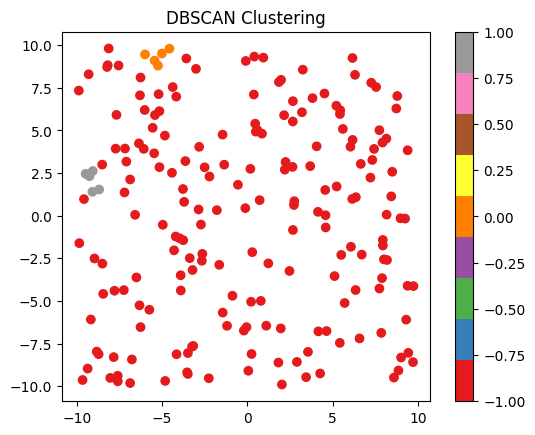

In [13]:
from sklearn.cluster import DBSCAN

# Extract coordinates for clustering
coords = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

# Apply DBSCAN clustering
db = DBSCAN(eps=1.0, min_samples=5).fit(coords)
gdf['cluster'] = db.labels_

# Visualize the clustering result
gdf.plot(column='cluster', cmap='Set1', legend=True)
plt.title("DBSCAN Clustering")
plt.show()


**Perform Hot Spot Analysis**